## Exercícios parte 4
### Mariana dos Santos Alves - 401280

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import fft
import numpy as np

1 - Problema 3.4

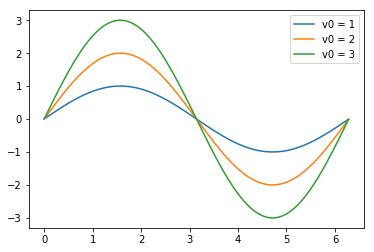

In [20]:
# intervalo de x
i, f = 0, 6.28
# número de pontos
N = 5000        
dt = (f-i)/N
# valor incial de x  
x0 = 0
#lista dos tempos      
t = np.linspace(i, f, N) 

# função que resolve a equação
def func(v0, alfa):  
    k = 1
    x = np.zeros(N)
    v = np.zeros(N)
    x[0] = x0
    v[0] = v0

    for j in range(1, N):
        v[j] = v[j-1] - k * dt * (x[j-1])**alfa
        x[j] = x[j-1] + dt * v[j-1]
    return x


for i in [1, 2, 3]:   
    plt.plot(t, func(i, 1), label = 'v0 = %i'%(i))
    
plt.legend()

2 - Problema 3.6 (Plotar o resultado analítico e o numérico nos casos descritos no problema)

[True, False, False, False]


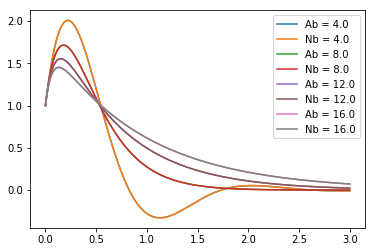

In [16]:
i, f = 0, 3
N = 5000
dt = (f-i)/N
# posição incial
teta0 = 1 
# velocidade inicial
w0 = 10 
t = np.linspace(i, f, N)

# resolução numérica da função
def funcN(b, c): 
    teta = np.zeros(N)
    w = np.zeros(N)
    teta[0] = teta0
    w[0] = w0

    for i in range(1, N):
        w[i] = w[i-1]*(1-b*dt) - c * dt * (teta[i-1])
        teta[i] = teta[i-1] + dt * w[i-1]
    return teta

# resolução analítica da função
def funcA(b, c): 
    
    if b**2>4*c:
        r1 = (-b + np.sqrt(b**2 - 4*c))/2
        r2 = (-b - np.sqrt(b**2 - 4*c))/2
        c1 = (w0-teta0*r2)/(r1-r2)
        c2 = teta0 - c1
        x = c1*np.e**(r1*t) + c2*np.e**(r2*t)
    if b**2==4*c:
        r = -b/2
        c1 = teta0
        c2 = w0 - c1*r
        x = c1*np.e**(r*t) + c2*t*np.e**(r*t)
    if b**2<4*c:
        rr = -b/2
        ri = (np.sqrt(np.abs(b**2 - 4*c))/2)
        c1= teta0
        c2= (w0 - rr*c1)/ri
        x = (np.e**(rr*t))*(c1*np.cos(ri*t)+c2*np.sin(ri*t))
    return x

# c = g/l e b = q
c=16  
bol=[]

# loop para o plot passar em diferentes b
for b in [4,8,12,16]: 
    # plot das funções analitica
    plt.plot(t, funcA(b, c), label = 'Ab = %1.1f'%(b)) 
    
    d = funcN(b, c)
    # plot das funções numerica
    plt.plot(t, d, label = 'Nb = %1.1f'%(b)) 
    
    # para saber de a função é subamortecida, amortecimenda criticamente ou superamortecida.
    if teta0 > 0:
        for j in range(len(d)):
            if d[j] <= 0:
                B = True
                break
            else:
                B = False
    else:
    
        for j in range(len(d)):
            if d[j] >= 0:
                B = True
                break
            else:
                B = False
    bol.append(B) 
    
#bol[i] = True para b[i] subamortecido e False para amortecimento crítico e superamortecimento.       
print(bol) 
plt.legend()

3 - Analise as Figuras 3.26 e 3.27. Escreva um código para simular cada dos casos descritos na Figura, e reproduza-as.

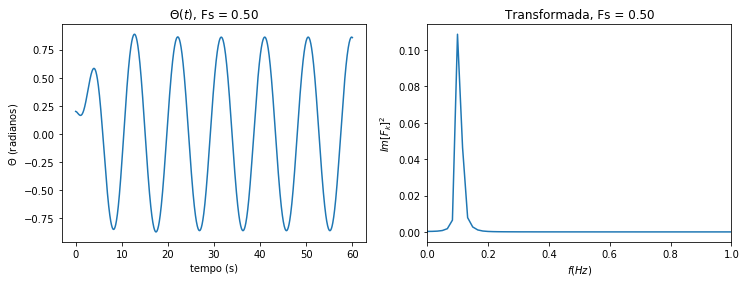

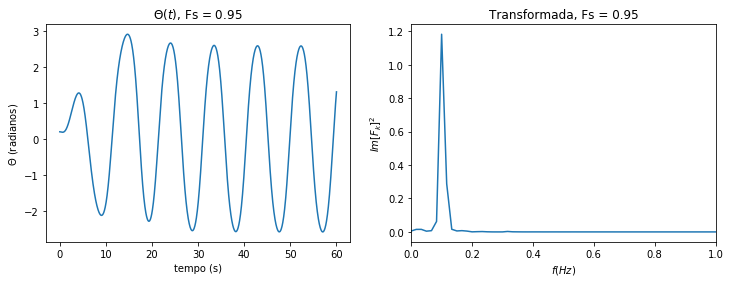

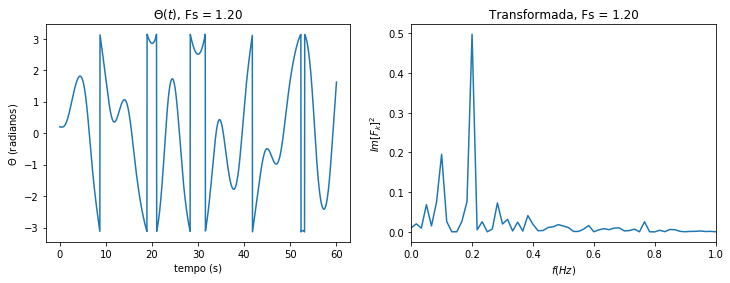

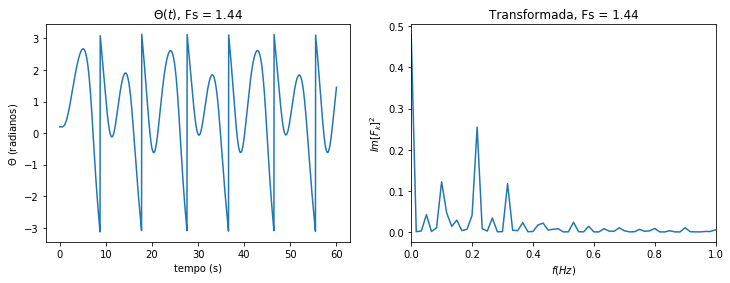

In [17]:
i, f = 0, 60
N = 1500 
dt = (f-i)/N
teta0 = 0.2
w0 = 0
t = np.linspace(i, f, N)
g = 9.8
l = g
q = 1/2
O = 2/3

#função que calcula o teta em função de Fd
def funcNL(Fd, I = False): 
    teta = np.zeros(N)
    w = np.zeros(N)
    teta[0] = teta0
    w[0] = w0

    for i in range(1, N):
        w[i] = w[i-1]+(-np.sin(teta[i-1])*(g/l)-q*w[i-1]+Fd*np.sin(O*t[i-1]))*dt
        teta[i] = teta[i-1] + dt * w[i]
        
        if I:
            if teta[i] >= np.pi:
                teta[i] = teta[i] - 2*np.pi
            elif teta[i] <= -np.pi:
                teta[i] = teta[i] + 2*np.pi
    return teta

for Fd in [0.5, 0.95, 1.2, 1.44]:
    fig, ax= plt.subplots(1,2,figsize=(12, 4))
    d = funcNL(Fd, 1)
    ax[0].plot(t, d)
    ax[0].set_xlabel('tempo (s)')
    ax[0].set_ylabel('$ \Theta $ (radianos) ')
    ax[0].set_title('$\Theta (t)$, Fs = %1.2f'%Fd)

    Tf=fft.fft(d)/N
    Tf = fft.fftshift(Tf)
    freq = fft.fftfreq(N,dt)
    freq = fft.fftshift(freq)
    ax[1].set_ylabel('$Im[F_k]^2$')
    ax[1].set_xlabel('$f (Hz)$')
    ax[1].plot(freq, np.absolute(Tf)**2)
    ax[1].set_xlim([0,1])
    ax[1].set_title('Transformada, Fs = %1.2f'%Fd)
    plt.show